In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi
from scipy.stats import binned_statistic_2d

from analysis.config import birds, h5_path_dict
from analysis.ExpData import ExpData

In [105]:
f = h5py.File(h5_path_dict['LMN73'][1].as_posix(), 'r')

In [106]:
f.keys()

<KeysViewHDF5 ['#refs#', 'A', 'C', 'C_raw', 'CacheFrames', 'CacheFramesEnter', 'CacheFramesExit', 'CacheSites', 'CacheVs', 'Extracted', 'IndOnlyCaches', 'IndOnlyRetrievals', 'S', 'ThisWasRetrieval', 'VS', 'VisitDur', 'VisitStart', 'VisitWedge', 'X', 'XDLC', 'Y', 'YDLC', 'indCachedMe', 'theta', 'whichWedge']>

In [107]:
exp_data = ExpData(f)

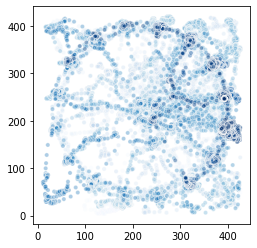

In [108]:
frames = np.arange(exp_data.num_frames)
df_arena = pd.DataFrame({"x":exp_data.x_loc, "y":exp_data.y_loc, "frames":frames})
plt.figure()
ax = plt.gca()
sns.scatterplot(
    x="x", y="y", hue="frames", size=0.1, data=df_arena, alpha=0.4,
    palette=sns.color_palette("Blues", n_colors=exp_data.x_loc.size),
    legend=False, ax=ax)
plt.gca().set_aspect("equal")
#plt.xticks([]); plt.yticks([])
plt.xlabel(""); plt.ylabel("")
plt.show()

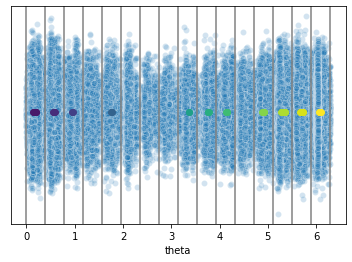

In [109]:
df = pd.DataFrame({
    "theta":exp_data.theta, "frames":exp_data.num_frames,
    "zeros":np.random.normal(0, 4, exp_data.num_frames)
    })
boundaries = np.linspace(0, 2*pi, 16, endpoint=False)
boundaries = np.append(boundaries, [2*pi])
CacheSites = np.array(f['CacheSites']).squeeze()
CacheFrames = np.array(f['CacheFrames']).squeeze()
cmap = cm.get_cmap('viridis')
plt.figure()
sns.scatterplot(
    x="theta", y="zeros", alpha=0.2, data=df
    )
for boundary in boundaries:
    plt.axvline(boundary, color="gray")
for idx, cache in enumerate(CacheSites):
    frame = np.argwhere(frames == CacheFrames[idx])[0,0]
    rgba = cmap(cache/16.)
    plt.scatter(exp_data.theta[frame], 0, color=rgba)
plt.yticks([]); plt.ylabel("")
plt.show()